# Decision Tree Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv("winequality_red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.shape

(1599, 12)

In [7]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [10]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [11]:
y


0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dc=DecisionTreeClassifier()
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
feature_name=list(X.columns)

In [19]:
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [20]:
class_name = list(y.unique())

class_name

[5, 6, 7, 4, 8, 3]

In [30]:
## graph 

In [93]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [26]:
## from sklearn.tree import export_graphviz
## import pydotplus
## from IPython.display import Image  
from sklearn.tree import  plot_tree

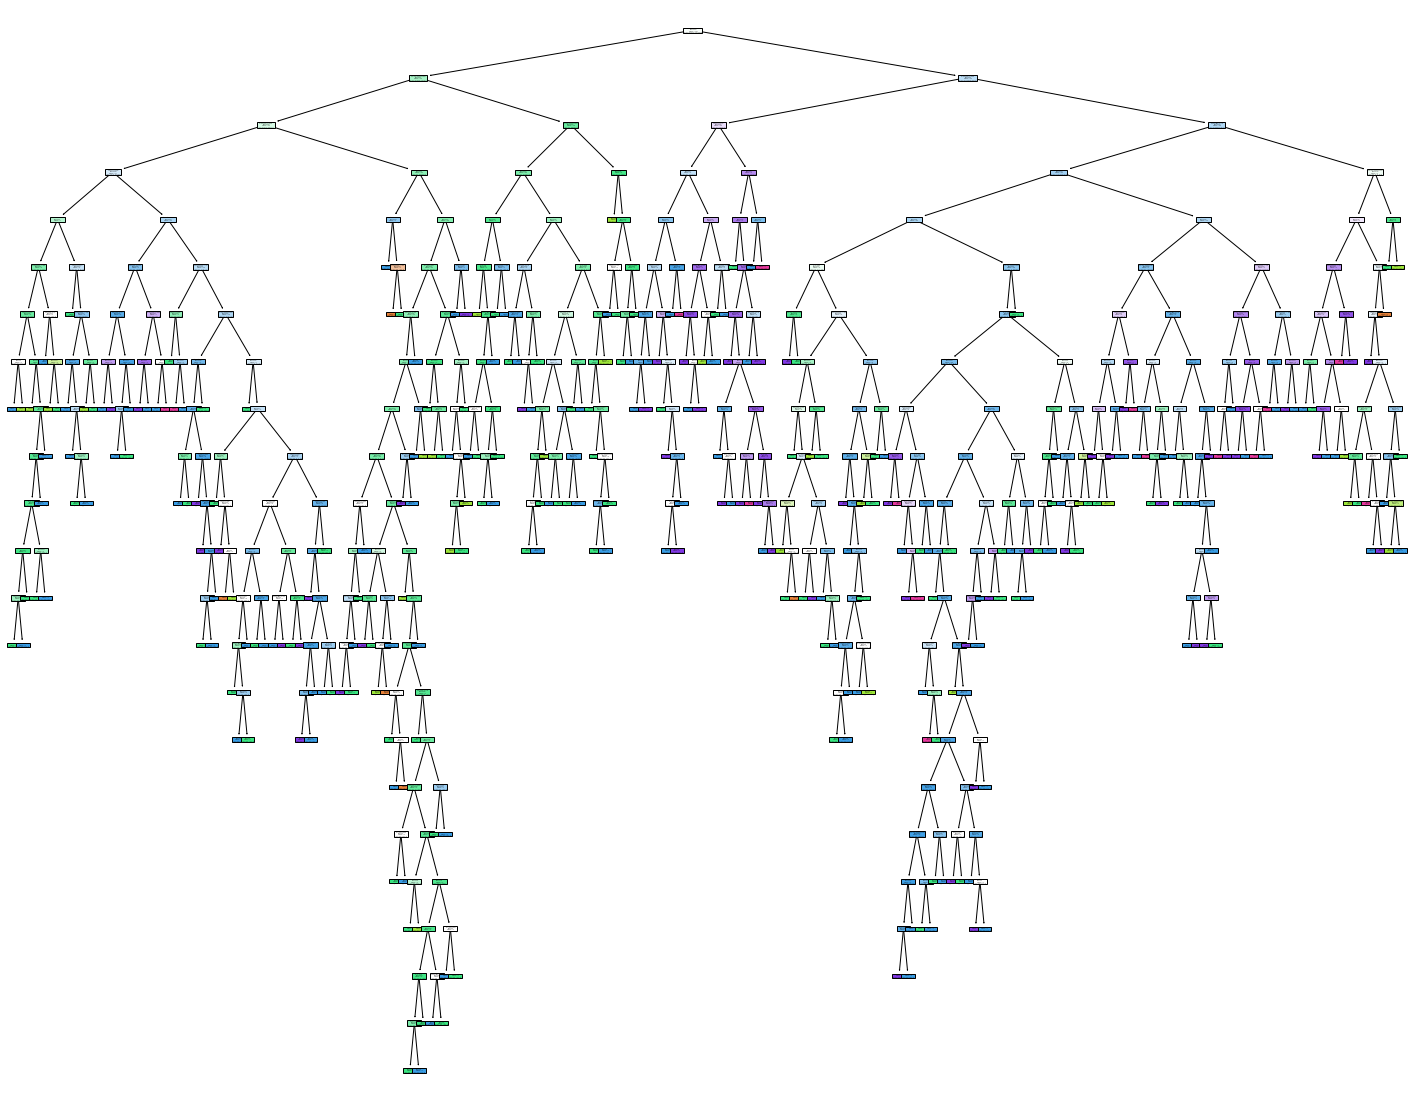

In [27]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dc, 
                   feature_names=feature_name,
                   filled=True)

In [96]:

pip install -U pydotplus

Requirement already up-to-date: pydotplus in c:\users\vikee\anaconda3\lib\site-packages (2.0.2)
Note: you may need to restart the kernel to use updated packages.


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report

In [29]:
y_pred=dc.predict(X_test)

In [30]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0   0   1   0   1   0]
 [  0   4   5   6   2   0]
 [  1   7 154  37  13   1]
 [  0   5  58 111  16   2]
 [  0   2   3   7  35   7]
 [  0   0   0   0   2   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.22      0.24      0.23        17
           5       0.70      0.72      0.71       213
           6       0.69      0.58      0.63       192
           7       0.51      0.65      0.57        54
           8       0.00      0.00      0.00         2

    accuracy                           0.63       480
   macro avg       0.35      0.36      0.36       480
weighted avg       0.65      0.63      0.64       480



In [31]:
accuracy_score(y_test,y_pred)

0.6333333333333333

In [72]:
## tune some hyperparameters using the GridSearchCV algorithm

GridSearchCV is a method used to tune our hyperparameters. We can pass different values of hyperparameters as parameters for grid search.
It does a exhaustive generation of combination of different parameters passed.
Using cross validation score, Grid Search returns the combination of hyperparameters for which the model is performing the best. 

In [32]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [33]:
grid_search = GridSearchCV(estimator=dc,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [34]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [35]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 23,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'splitter': 'random'}

In [36]:
grid_search.best_score_

0.6085321909032672

In [37]:
dc= DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1, min_samples_split= 2, splitter ='random')
dc.fit(X_train,y_train)
y_pred=dc.predict(X_test)

In [38]:
accuracy_score(y_test,y_pred)

0.5895833333333333

Great!! Our test score has improved after using Gridsearch.

In [39]:
confusion_matrix(y_test, y_pred)

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,   9,   8,   0,   0],
       [  0,   6, 142,  53,  11,   1],
       [  0,   6,  52, 106,  24,   4],
       [  0,   1,   3,  15,  34,   1],
       [  0,   0,   0,   1,   0,   1]], dtype=int64)

In [40]:
classification_report(y_test, y_pred)

C:\Users\Vikee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         2\n           4       0.00      0.00      0.00        17\n           5       0.68      0.67      0.67       213\n           6       0.58      0.55      0.57       192\n           7       0.49      0.63      0.55        54\n           8       0.14      0.50      0.22         2\n\n    accuracy                           0.59       480\n   macro avg       0.32      0.39      0.34       480\nweighted avg       0.59      0.59      0.59       480\n'

In [41]:
import pickle

In [42]:
# open a file, where you ant to store the data
file = open('decisiontree.pkl', 'wb')

# dump information to that file
pickle.dump(grid_search, file)